# Transcriptomics
## DEG analysis

By: Sébastien Lemieux & Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 10th 2024

<hr style="border:1px solid black"> </hr>


In a terminal, launch `R` and enter the following commands (one after the other!):
```
install.packages("IRkernel")
IRkernel::installspec(name="ir44", displayname="R 4.4") ## check for 4.4?
```
This will install the most recent version of R as a kernel for your jupyter notebooks. Then switch this notebook to that kernel.

In [98]:
version

               _                           
platform       x86_64-redhat-linux-gnu     
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          4.0                         
year           2024                        
month          04                          
day            24                          
svn rev        86474                       
language       R                           
version.string R version 4.4.0 (2024-04-24)
nickname       Puppy Cup                   

In [99]:
.libPaths()

[1] "/u/francoij/R/x86_64-redhat-linux-gnu-library/4.4"
[2] "/usr/lib64/R/library"                             
[3] "/usr/share/R/library"

In [4]:
### We will be using the EdgeR library: https://www.bioconductor.org/packages/release/bioc/vignettes/edgeR/inst/doc/edgeRUsersGuide.pdf
### First, install it
#installer les packages de bioconducteur
install.packages("BiocManager")

Installing package into ‘/u/francoij/R/x86_64-redhat-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)



In [6]:
BiocManager::install("edgeR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'edgeR'

also installing the dependencies ‘statmod’, ‘limma’, ‘locfit’, ‘Rcpp’


Installation paths not writeable, unable to update packages
  path: /usr/lib64/R/library
  packages:
    foreign, KernSmooth, MASS, nlme, survival



In [7]:
### Then, load it it's import for python and ilbrary for R
library(edgeR)

Loading required package: limma



In [145]:
### Monday you created a data file concisting of counts of read per gene
### across 6 samples: 3 controls and 3 treatments. 
### We will use this dataset to do our DEG analysis.

### Upload data
counts <- read.delim("/u/francoij/Untitled Folder/code_github/notebooks/all_gene_count_all_samples.tsv", row.names=1)
counts

,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,1,0,0,0,0,0
ENSG00000227232,1,0,0,1,0,1
ENSG00000278267,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0
ENSG00000240361,0,0,0,0,0,0
ENSG00000186092,0,0,0,0,0,0


In [146]:
head(counts)

,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,1,0,0,0,0,0
ENSG00000227232,1,0,0,1,0,1
ENSG00000278267,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0


In [147]:
tail(counts)

,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000275063,0,0,0,0,0,0
ENSG00000271254,209,251,285,180,160,229
ENSG00000275405,0,0,0,0,0,0
ENSG00000275987,0,0,0,0,0,0
ENSG00000277475,0,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0


In [148]:
### We need to define categorical values (called factors) that are associated to each sample type.
### We will use "C" for the Controls and "T" for the Treatments.
#to create a function or a list use c
countsGroup <- c("T", "T", "T", "C", "C", "C")


### Create a list of these categorical values that will eventually be assigned to your
### samples. Be careful to keep the same order as the one in your dataset!


### Convert the string labels into factors
groups <- factor(countsGroup)
countsGroup
groups

[1] "T" "T" "T" "C" "C" "C"

[1] T T T C C C
Levels: C T

In [149]:
### We now need to define the "design" matrix. 
#ha matrix that we will use is coming from groups, 0 means...

design <- model.matrix(~0 + groups)
design

,groupsC,groupsT
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0


In [150]:
rownames(counts)

[1] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485"
    [5] "ENSG00000284332" "ENSG00000237613" "ENSG00000268020" "ENSG00000240361"
    [9] "ENSG00000186092" "ENSG00000238009" "ENSG00000239945" "ENSG00000233750"
   [13] "ENSG00000268903" "ENSG00000269981" "ENSG00000239906" "ENSG00000241860"
   [17] "ENSG00000222623" "ENSG00000241599" "ENSG00000279928" "ENSG00000279457"
   [21] "ENSG00000273874" "ENSG00000228463" "ENSG00000286448" "ENSG00000236679"
   [25] "ENSG00000236601" "ENSG00000237094" "ENSG00000269732" "ENSG00000284733"
   [29] "ENSG00000233653" "ENSG00000250575" "ENSG00000278757" "ENSG00000230021"
   [33] "ENSG00000235146" "ENSG00000225972" "ENSG00000225630" "ENSG00000237973"
   [37] "ENSG00000278791" "ENSG00000229344" "ENSG00000240409" "ENSG00000248527"
   [41] "ENSG00000198744" "ENSG00000268663" "ENSG00000284662" "ENSG00000229376"
   [45] "ENSG00000228327" "ENSG00000223181" "ENSG00000229905" "ENSG00000237491"
   [49] "ENSG00000285268" "ENSG00000230092" "ENSG00000177757" "ENSG00000228794"
   [53] "ENSG00000225880" "ENSG00000288531" "ENSG00000230368" "ENSG00000234711"
   [57] "ENSG00000283040" "ENSG00000272438" "ENSG00000230699" "ENSG00000241180"
   [61] "ENSG00000223764" "ENSG00000187634" "ENSG00000188976" "ENSG00000187961"
   [65] "ENSG00000187583" "ENSG00000187642" "ENSG00000272512" "ENSG00000188290"
   [69] "ENSG00000187608" "ENSG00000231702" "ENSG00000224969" "ENSG00000188157"
   [73] "ENSG00000242590" "ENSG00000217801" "ENSG00000273443" "ENSG00000237330"
   [77] "ENSG00000131591" "ENSG00000285812" "ENSG00000223823" "ENSG00000207730"
   [81] "ENSG00000207607" "ENSG00000198976" "ENSG00000272141" "ENSG00000205231"
   [85] "ENSG00000162571" "ENSG00000186891" "ENSG00000186827" "ENSG00000078808"
   [89] "ENSG00000176022" "ENSG00000184163" "ENSG00000260179" "ENSG00000160087"
   [93] "ENSG00000230415" "ENSG00000162572" "ENSG00000131584" "ENSG00000278073"
   [97] "ENSG00000169972" "ENSG00000127054" "ENSG00000283712" "ENSG00000240731"
  [101] "ENSG00000224051" "ENSG00000169962" "ENSG00000107404" "ENSG00000284372"
  [105] "ENSG00000162576" "ENSG00000175756" "ENSG00000223663" "ENSG00000221978"
  [109] "ENSG00000224870" "ENSG00000242485" "ENSG00000264293" "ENSG00000272455"
  [113] "ENSG00000235098" "ENSG00000225905" "ENSG00000205116" "ENSG00000225285"
  [117] "ENSG00000179403" "ENSG00000215915" "ENSG00000160072" "ENSG00000284740"
  [121] "ENSG00000197785" "ENSG00000205090" "ENSG00000160075" "ENSG00000215014"
  [125] "ENSG00000274481" "ENSG00000228594" "ENSG00000286989" "ENSG00000272106"
  [129] "ENSG00000197530" "ENSG00000189409" "ENSG00000248333" "ENSG00000272004"
  [133] "ENSG00000189339" "ENSG00000269737" "ENSG00000215914" "ENSG00000008128"
  [137] "ENSG00000268575" "ENSG00000227775" "ENSG00000215790" "ENSG00000008130"
  [141] "ENSG00000078369" "ENSG00000231050" "ENSG00000169885" "ENSG00000178821"
  [145] "ENSG00000142609" "ENSG00000233542" "ENSG00000187730" "ENSG00000226969"
  [149] "ENSG00000067606" "ENSG00000271806" "ENSG00000182873" "ENSG00000162585"
  [153] "ENSG00000234396" "ENSG00000157933" "ENSG00000287356" "ENSG00000116151"
  [157] "ENSG00000272161" "ENSG00000269896" "ENSG00000272420" "ENSG00000157916"
  [161] "ENSG00000157911" "ENSG00000149527" "ENSG00000224387" "ENSG00000229393"
  [165] "ENSG00000157881" "ENSG00000197921" "ENSG00000272449" "ENSG00000238164"
  [169] "ENSG00000157873" "ENSG00000225931" "ENSG00000228037" "ENSG00000157870"
  [173] "ENSG00000142606" "ENSG00000237058" "ENSG00000215912" "ENSG00000285945"
  [177] "ENSG00000283259" "ENSG00000233234" "ENSG00000287396" "ENSG00000231630"
  [181] "ENSG00000284745" "ENSG00000169717" "ENSG00000177133" "ENSG00000142611"
  [185] "ENSG00000283572" "ENSG00000226286" "ENSG00000279839" "ENSG00000272235"
  [189] "ENSG00000287828" "ENSG00000286518" "ENSG00000130762" "ENSG00000272088"
  [193] "ENSG00000162591" "ENSG00000207776" "ENSG00000238260" "ENSG00000158109"
  [197] "ENSG00000116213" "ENSG00000078900" "ENSG00000227589" "ENSG00000235131"
  [2

In [151]:
### Create a DEG object i.e. make our data into an object that be passed to various edgeR function
### Look at the ouput: what does this object contains?
#a singel variable which can contain a lot of variables, a package of variables that stay together. 
dgList <- DGEList(counts,genes=rownames(counts),group=groups)
dgList

,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
ENSG00000223972,1,0,0,0,0,0
ENSG00000227232,1,0,0,1,0,1
ENSG00000278267,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0
ENSG00000240361,0,0,0,0,0,0
ENSG00000186092,0,0,0,0,0,0
ENSG00000238009,1,0,0,0,0,1


In [152]:
### Compute the normalization factors to account for different library sizes.
#calculate a lot of things, it returns a list again with variable counts,new values in the second table, need to apply this factor
calcNormFactors(dgList)

,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
ENSG00000223972,1,0,0,0,0,0
ENSG00000227232,1,0,0,1,0,1
ENSG00000278267,0,0,0,0,0,0
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0
ENSG00000240361,0,0,0,0,0,0
ENSG00000186092,0,0,0,0,0,0
ENSG00000238009,1,0,0,0,0,1


,genes
,<chr>
ENSG00000223972,ENSG00000223972
ENSG00000227232,ENSG00000227232
ENSG00000278267,ENSG00000278267
ENSG00000243485,ENSG00000243485
ENSG00000284332,ENSG00000284332
ENSG00000237613,ENSG00000237613
ENSG00000268020,ENSG00000268020
ENSG00000240361,ENSG00000240361
ENSG00000186092,ENSG00000186092


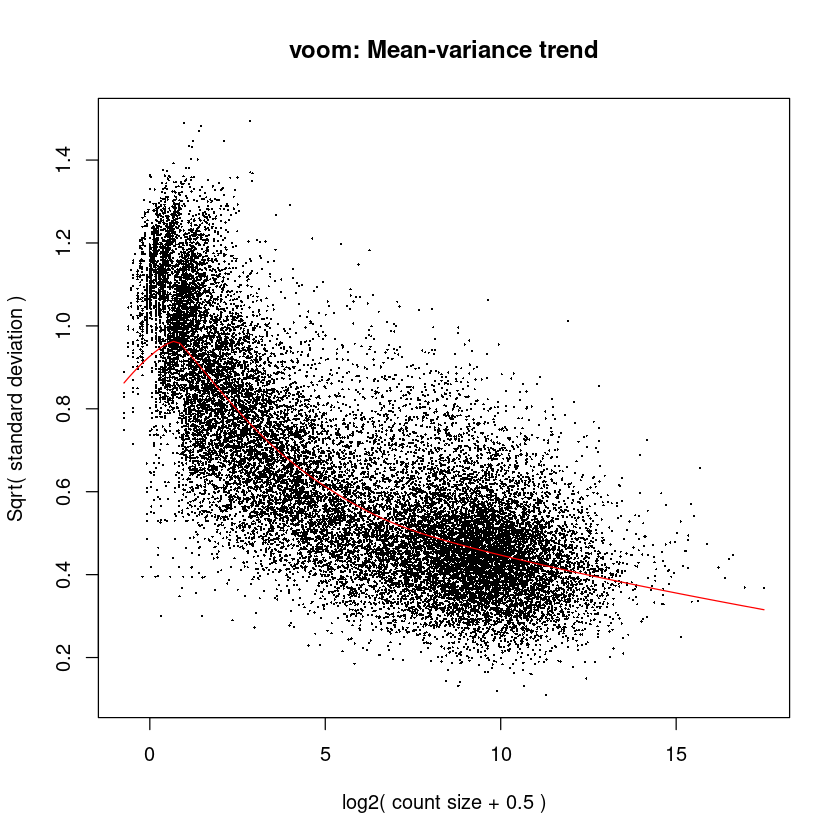

In [153]:
### It is time to use voom :) 
### This will allow you to transform your count data to log2-counts per million (logCPM).
### https://www.rdocumentation.org/packages/limma/versions/3.28.14/topics/voom
# we have a lot of new variables now.
#eah dot will be a gene, and each variable with a gene. 
y <- voom(dgList, design, plot=T)
y

In [154]:
#### Let's fit a linear model, using weighted least squares for each gene
# the red line estimate to make the analysis. 
#do the computation
#for each gene we have a songle value for each group
fit <- lmFit(y, design)
fit

,groupsC,groupsT
ENSG00000223972,-4.9641736,-4.3547090
ENSG00000227232,-3.9159187,-4.3547090
ENSG00000278267,-4.9641736,-4.8599045
ENSG00000243485,-4.9641736,-4.8599045
ENSG00000284332,-4.9641736,-4.8599045
ENSG00000237613,-4.9641736,-4.8599045
ENSG00000268020,-4.9641736,-4.8599045
ENSG00000240361,-4.9641736,-4.8599045
ENSG00000186092,-4.9641736,-4.8599045
ENSG00000238009,-4.4547031,-4.3547090


In [155]:
### Comparisons between groups (log fold-changes) are obtained as 
### contrasts of these fitted linear models
coef(fit)

,groupsC,groupsT
ENSG00000223972,-4.9641736,-4.3547090
ENSG00000227232,-3.9159187,-4.3547090
ENSG00000278267,-4.9641736,-4.8599045
ENSG00000243485,-4.9641736,-4.8599045
ENSG00000284332,-4.9641736,-4.8599045
ENSG00000237613,-4.9641736,-4.8599045
ENSG00000268020,-4.9641736,-4.8599045
ENSG00000240361,-4.9641736,-4.8599045
ENSG00000186092,-4.9641736,-4.8599045
ENSG00000238009,-4.4547031,-4.3547090


In [156]:
#now what we want is to see the difference between the two
#see the contrast
cont <- makeContrasts(groupsT - groupsC, levels=colnames(coef(fit)))
cont
#it's look a bit weird
#this is one group versus another

,groupsT - groupsC
groupsC,-1
groupsT,1


In [157]:
### Estimate contrast for each gene

# log2(A/B) == log2(A) - log2(B)
tmp <- contrasts.fit(fit, cont)
tmp

,groupsT - groupsC
ENSG00000223972,0.60946453
ENSG00000227232,-0.43879031
ENSG00000278267,0.10426909
ENSG00000243485,0.10426909
ENSG00000284332,0.10426909
ENSG00000237613,0.10426909
ENSG00000268020,0.10426909
ENSG00000240361,0.10426909
ENSG00000186092,0.10426909
ENSG00000238009,0.09999404


In [158]:
### Empirical Bayes smoothing of standard errors
#here we replace the older tmp by the new one just after
tmp <- eBayes(tmp)
tmp

,groupsT - groupsC
ENSG00000223972,0.60946453
ENSG00000227232,-0.43879031
ENSG00000278267,0.10426909
ENSG00000243485,0.10426909
ENSG00000284332,0.10426909
ENSG00000237613,0.10426909
ENSG00000268020,0.10426909
ENSG00000240361,0.10426909
ENSG00000186092,0.10426909
ENSG00000238009,0.09999404


In [159]:
### Create top table
topTable(tmp)

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000074527,ENSG00000074527,-1.339166,7.366807,-31.23315,1.284020e-07,0.001858125,8.644275
ENSG00000151892,ENSG00000151892,2.530967,5.702625,31.92516,1.133285e-07,0.001858125,8.615937
ENSG00000147255,ENSG00000147255,4.212719,5.036796,32.54070,1.016408e-07,0.001858125,8.565757
ENSG00000164128,ENSG00000164128,3.297861,5.723449,27.20793,2.816568e-07,0.002136191,7.838057
ENSG00000146674,ENSG00000146674,-1.794297,4.904943,-26.45001,3.307527e-07,0.002172440,7.653544
ENSG00000115594,ENSG00000115594,-2.560830,4.729097,-25.41185,4.152968e-07,0.002172440,7.433000
ENSG00000085999,ENSG00000085999,1.312575,4.600567,24.53064,5.075052e-07,0.002172440,7.262501
ENSG00000196208,ENSG00000196208,4.249825,7.865723,24.01282,5.728726e-07,0.002172440,7.230332
ENSG00000233476,ENSG00000233476,3.076129,1.454574,29.32850,1.837454e-07,0.001858125,7.167099


In [160]:
top <-topTable(tmp, sort.by="P", n=Inf)
top
head(top)
#FC : lof for change
#ave : average expression : what kind of standard deviation is apply to the test

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000147255,ENSG00000147255,4.2127188,5.036796,32.54070,1.016408e-07,0.001858125,8.565757
ENSG00000151892,ENSG00000151892,2.5309674,5.702625,31.92516,1.133285e-07,0.001858125,8.615937
ENSG00000213673,ENSG00000213673,4.7300858,-2.601906,31.41573,1.242076e-07,0.001858125,5.558399
ENSG00000074527,ENSG00000074527,-1.3391662,7.366807,-31.23315,1.284020e-07,0.001858125,8.644275
ENSG00000151224,ENSG00000151224,5.1053038,-2.408434,29.57482,1.752000e-07,0.001858125,5.565237
ENSG00000233476,ENSG00000233476,3.0761289,1.454574,29.32850,1.837454e-07,0.001858125,7.167099
ENSG00000258846,ENSG00000258846,4.9126540,-2.504849,27.71073,2.537913e-07,0.002136191,5.415413
ENSG00000164128,ENSG00000164128,3.2978612,5.723449,27.20793,2.816568e-07,0.002136191,7.838057
ENSG00000146674,ENSG00000146674,-1.7942967,4.904943,-26.45001,3.307527e-07,0.002172440,7.653544


,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000147255,ENSG00000147255,4.212719,5.036796,32.54070,1.016408e-07,0.001858125,8.565757
ENSG00000151892,ENSG00000151892,2.530967,5.702625,31.92516,1.133285e-07,0.001858125,8.615937
ENSG00000213673,ENSG00000213673,4.730086,-2.601906,31.41573,1.242076e-07,0.001858125,5.558399
ENSG00000074527,ENSG00000074527,-1.339166,7.366807,-31.23315,1.284020e-07,0.001858125,8.644275
ENSG00000151224,ENSG00000151224,5.105304,-2.408434,29.57482,1.752000e-07,0.001858125,5.565237
ENSG00000233476,ENSG00000233476,3.076129,1.454574,29.32850,1.837454e-07,0.001858125,7.167099


In [162]:
### Export table
write.table(top, file ="top2.csv", row.names=F, sep=",", quote=F )

**Continue with the Python notebook for today!**